## 地理编码

In [12]:
import pandas as pd

In [13]:
import requests
key ="a4f009c068fd6adc58d63d2f48ffe5a0"
def geo(address:str,city=str)->dict:
    """获取地理编码"""
    parameters={
        'key': key,
        'address':address,
        'city':city,
        'citylimit': True
    }
    r = requests.get("https://restapi.amap.com/v3/geocode/geo?parameters",params=parameters)
    data = r.json()['geocodes'][0]['location']
    return data

In [8]:
parameters={
    'key': key,
     'address':"广东省惠州市惠城区惠州市实验中学",
     'city':"惠州",
    'citylimit': True
}
r = requests.get("https://restapi.amap.com/v3/geocode/geo?parameters",params=parameters)
r.json()

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省惠州市惠城区惠州市实验中学',
   'country': '中国',
   'province': '广东省',
   'citycode': '0752',
   'city': '惠州市',
   'district': '惠城区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '441302',
   'street': [],
   'number': [],
   'location': '114.398462,23.057747',
   'level': '兴趣点'}]}

In [9]:
geo("广东省惠州市惠城区惠州市实验中学","惠州")

'114.398462,23.057747'

In [10]:
geo("广东省惠州市惠城区名流印象小区","惠州")

'114.398253,23.053472'

## 逆地理编码

In [35]:
def place_find(location=float):
    parameters = {
        'key':key,
        'location':location,
        'output':'json'
    }
    r = requests.get('https://restapi.amap.com/v3/geocode/regeo?parameters',params=parameters)
    place = r.json()
    place_find_result = place["regeocode"]["formatted_address"]
    return place_find_result

In [36]:
area = place_find('114.398462,23.057747')
area

'广东省惠州市惠城区龙丰街道三环南路1号惠州市实验中学'

### 思考
* 地理/逆地理编码API: 地理编码指的是从已知的地址到对应的经纬 度坐标的转换，即根据地址信息，获取地址所对应的点坐标。 逆地理编码是指从已知的经纬度坐标到对应的地址（如省市、街区、楼层、房间等）的转换。这类功能是从数据库中提取数据进行匹配，所以我认为它不具备ML、AI的功能的。

## 路径规划

In [15]:
def walking(origin:str,destination:str)->dict:
    parameters = {
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    r = requests.get("https://restapi.amap.com/v3/direction/walking?parameters",params=parameters)
    data = r.json()['route']['paths'][0]['steps']
    for i in range(0,len(data)):
        print(data[int(i)]['instruction'])

In [16]:
walking(geo("广东省惠州市惠城区惠州市实验中学","惠州"),geo("广东省惠州市惠城区名流印象小区","惠州"))

向西南步行22米向左前方行走
向南步行124米左转
沿三环南路向东步行50米左转
步行115米左转
沿三环南路向西步行112米左转
沿宝安路向南步行43米向右前方行走
步行200米左转
向东步行33米右转
向东南步行117米到达目的地


### 思考
* 路径规划API是提供的步行、公交、驾车查询及行驶距离计算，返回JSON 或 XML格式的查询数据。且这类功能运用了多种算法，比如：Dijkstra算法、A 算法、D 路径搜索算法等。是AI中的规划功能，所以我认为它背后含有ML、AI的功能。

## 行政区域查询

In [19]:
def district(keywords,subdistrict):
    parameters={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':'1',
        'offset':'20',
        'extensions':'base',
        'filter':'filter',
        'output':'json'
    }
    r = requests.get('https://restapi.amap.com/v3/config/district?parameters',params=parameters)
    data = r.json()
    return data

In [22]:
import pandas as pd
df = pd.DataFrame(district('广东','2')["districts"][0]["districts"])
df

,citycode,adcode,name,center,level,districts
0,0758,441200,肇庆市,"112.472529,23.051546",city,"[{'citycode': '0758', 'adcode': '441224', 'nam..."
1,0757,440600,佛山市,"113.122717,23.028762",city,"[{'citycode': '0757', 'adcode': '440607', 'nam..."
2,0754,440500,汕头市,"116.708463,23.37102",city,"[{'citycode': '0754', 'adcode': '440513', 'nam..."
3,0752,441300,惠州市,"114.412599,23.079404",city,"[{'citycode': '0752', 'adcode': '441324', 'nam..."
4,0755,440300,深圳市,"114.085947,22.547",city,"[{'citycode': '0755', 'adcode': '440306', 'nam..."
5,0756,440400,珠海市,"113.553986,22.224979",city,"[{'citycode': '0756', 'adcode': '440402', 'nam..."
6,0759,440800,湛江市,"110.364977,21.274898",city,"[{'citycode': '0759', 'adcode': '440883', 'nam..."
7,0662,441700,阳江市,"111.975107,21.859222",city,"[{'citycode': '0662', 'adcode': '441781', 'nam..."
8,0660,441500,汕尾市,"115.364238,22.774485",city,"[{'citycode': '0660', 'adcode': '441523', 'nam..."
9,0768,445100,潮州市,"116.632301,23.661701",city,"[{'citycode': '0768', 'adcode': '445122', 'nam..."


### 思考
* 行政区域查询API，根据用户输入的搜索条件可以帮助用户快速的查找特定的行政区域信息，且adcode信息可参考城市编码表获取。所以我认为这类功能只是从数据库中调取用户所需的数据，背后并不含有ML、AI的功能。

## 搜索POI

In [208]:
def poi(keywords:str,city=str):
    parameters = {
        'key':key,
        'city':"广东",
        "types":"生活服务",
        'keywords':"瑞幸咖啡",
        'output':'json'
    }
    r = requests.get('https://restapi.amap.com/v3/place/text?parameters',params=parameters)
    data = r.json()
    pois = []
    pois.extend(data['pois'])
    df_input = pd.DataFrane(pois)
    return df_input


In [209]:
cot = pd.json_normalize(data['pois'])
cot

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,...,cityname,adname,importance,shopid,shopinfo,poiweight,photos,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B0FFIYU7CF,B00140BXV1,201,瑞幸咖啡(中天购物城),餐饮服务;咖啡厅;咖啡厅,050500,diner,天河北路233号中天购物城B1层后街15号,"113.324537,23.142369",[],...,广州市,天河区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.0,21.00,0
1,B0FFIYKL41,[],[],瑞幸咖啡(高志大厦店),餐饮服务;咖啡厅;咖啡厅,050500,diner,高志大厦3层307,"113.339756,23.125773",[],...,广州市,天河区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.0,18.00,0
2,B0FFIYKL40,B00141J6W1,202,瑞幸咖啡(羊城商贸店),餐饮服务;咖啡厅;咖啡厅,050500,diner,羊城国际商贸中心东座1层160号,"113.329145,23.136491",[],...,广州市,天河区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,22.00,0
3,B0FFIYU7DB,B00140TZYH,202,瑞幸咖啡(银汇大厦店),餐饮服务;咖啡厅;咖啡厅,050500,diner,银汇大厦大堂,"113.345272,23.143992",[],...,广州市,天河区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,16.00,0
4,B0FFIYU7EN,B0FFGPWOV0,202,瑞幸咖啡(同乐汇店),餐饮服务;咖啡厅;咖啡厅,050500,diner,同乐汇1层102,"113.271722,23.103923",18598109240,...,广州市,海珠区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.0,18.00,0
5,B0FFIY7JU7,[],[],luckincoffee(和业广场店),餐饮服务;咖啡厅;咖啡厅,050500,diner,康王中路486号和业广场一层108之1010B,"113.247357,23.121917",[],...,广州市,荔湾区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.0,23.00,0
6,B0FFJN8L73,B00140JQMK,202,瑞幸咖啡(荔天大厦店),餐饮服务;咖啡厅;咖啡厅,050500,diner,周门北路28号荔天大厦一层1号,"113.240805,23.132696",[],...,广州市,荔湾区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.0,20.00,0
7,B0FFJO8N7F,B00141JFBP,201,瑞幸咖啡(南丰汇),餐饮服务;咖啡厅;咖啡厅,050500,diner,新港东路618号南丰汇F3层F309,"113.357461,23.098019",[],...,广州市,海珠区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,21.00,0
8,B0FFKTCXPQ,B00140282F,202,瑞幸咖啡(粤运大厦店),餐饮服务;咖啡厅;咖啡厅,050500,diner,中山二路3号粤运大厦底商,"113.292958,23.124146",[],...,广州市,越秀区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,22.00,0
9,B0FFJIQXEV,B0FFH1Z5DK,202,瑞幸咖啡,餐饮服务;咖啡厅;咖啡厅,050500,diner,广州大道中988号圣丰广场北塔一层109自编01号,"113.315734,23.138347",[],...,广州市,天河区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,20.00,0


### 思考
* 搜索服务API，提供多种查询POI信息的能力，其中包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制。在使用之前可以通过city&citylimit参数指定希望搜索的城市或区县以及需要查询的服务类型type。所以我认为其背后含有ML、AI的功能。

## IP定位

In [65]:
def IP(IP):
    params = {
        'key':key,
        'ip':IP,
        'output':'json',
    }

    r = requests.get('https://restapi.amap.com/v3/ip?parameters',params=parameters)
    IP_place = r.json()["city"]
    return IP_place

In [67]:
IP('182.254.192.28')

'广州市'

### 思考
* IP定位API，是将IP信息转换为地理位置信息的单向转换，所以我认为其背后不含有ML、AI的功能。

## 批量请求接口

In [26]:
def request_port(x,y):
    headers = {
            'Content-Type':'application/json'
    }

    body = {
        "ops": [
            {
                "url": '/v3/place/around?offset=10&page=1&key=5d9ecde3c906860e39493987d1053573&output=json&radius=100000&types=080000&location='+ x
            },
            {
                "url": '/v3/place/around?offset=10&page=1&key=5d9ecde3c906860e39493987d1053573&output=json&radius=100000&types=080000&location='+ y
            }
        ]
    }

    parameters = {
        'key':key
    }

    r = requests.post('https://restapi.amap.com/v3/batch?key',params=parameters,headers=headers,json=body)
    data = r.json()
    return data

In [31]:
place_1 = geo('广东省惠州市惠城区惠州市实验中学','guangdon')
place_2 = geo('广东省惠州市惠城区名流印象小区','guangdon')

request_port(place_1,place_2)

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '426',
   'pois': [{'typecode': '080100',
     'adname': '惠城区',
     'biz_type': {},
     'id': 'B0FFGO14QR',
     'pname': '广东省',
     'importance': {},
     'parent': {},
     'location': '114.395128,23.058747',
     'distance': '359',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '仲恺大道与口岸路交叉口西南100米',
     'poiweight': {},
     'cityname': '惠州市',
     'photos': [{'url': 'http://store.is.autonavi.com/showpic/46ee7160e1ef1bf5823e76c23cc0aed8',
       'title': {},
       'provider': {}}],
     'type': '体育休闲服务;运动场馆;运动场所',
     'shopinfo': '0',
     'name': '陈家沟陈梦松太极(惠州馆)',
     'childtype': {}},
    {'typecode': '080119',
     'adname': '惠城区',
     'biz_type': {},
     'id': 'B0FFI6SVD3',
     'pname': '广东省',
     'importance': {},
     'parent': {},
     'location': '114.395109,23.058852',
     'distance': '364',
     '

### 思考
* 批量接口通过用户传入合并后的请求，同时返回多个请求的顺序集合。这类功能是同时处理多个请求，但依旧是从数据库中提取数据，所以我认为其背后不含有ML、AI的功能。

## 静态地图

In [32]:
from PIL import Image
from io import BytesIO

In [46]:
def map(location:str,zoom:str):
    parameters={
        'key':key,
        'location':location,
        'zoom':zoom,
    }
    r = requests.get('https://restapi.amap.com/v3/staticmap?parameters',params=parameters)
    data = Image.open(BytesIO(r.content))
    return data

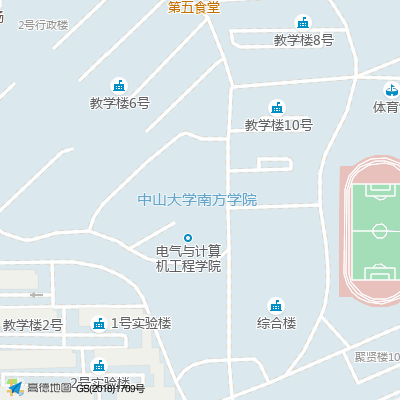

In [47]:
map(geo("广东省广州市从化区中山大学南方学院","广州"),16)

### 思考
* 静态地图API，用户可以指定请求的地图位置、图片大小、以及在地图上添加覆盖物，如标签、标注、折线、多边形，需要给用户展示计算机视觉的相关功能，所以我认为其背后含有ML、AI的功能。

## 坐标转换

In [48]:
# 输入百度地图的坐标经纬度 --->  转换成高德地图的经纬度
def coordinate_change(locations):
    parameters = {
        'key':key,
        'locations':locations,
        'coordsys':'baidu',
        'output':'json',
    }

    r = requests.get('https://restapi.amap.com/v3/assistant/coordinate/convert?parameters',params=parameters)
    coordinate_change = r.json()
    coordinate_change_result = coordinate_change["locations"]
    return coordinate_change_result

In [50]:
coordinate_change('106.459861,29.565468')

'106.453411628655,29.559219459526'

### 思考
* 坐标转换API需要通过算法计算对比不同平台坐标，所以我认为其背后含有ML、AI的功能。

## 天气查询

In [53]:
def weather(city,extensions=all):
    parameters = {
        'key':key,
        'city':'500000',
        'extensions':'all',
        'output':'json',
    }

    r = requests.get('https://restapi.amap.com/v3/weather/weatherInfo?parameters',params=parameters)
    weather_find = r.json()
    return weather_find

In [54]:
# 重庆城市代码：500000
df = pd.DataFrame(weather(500000)["forecasts"][0]["casts"])
df.rename(columns={'date':'日期'})

,日期,week,dayweather,nightweather,daytemp,nighttemp,daywind,nightwind,daypower,nightpower
0,2020-04-23,4,小雨,小雨,14,12,东南,东南,≤3,≤3
1,2020-04-24,5,阴,阴,17,12,东南,东南,≤3,≤3
2,2020-04-25,6,阴,多云,20,13,西北,西北,≤3,≤3
3,2020-04-26,7,多云,多云,25,14,东南,东南,≤3,≤3


### 思考
* 天气查询API是根据用户输入的adcode，查询目标区域当前/未来的天气情况。所以我认为其背后不含有ML、AI的功能。

## 输入提示

In [55]:
def input_tips(keywords,city):
    parameters = {
        'key':key,
        'keywords':keywords,
        'city':city,
        'output':'json',
    }

    r = requests.get('https://restapi.amap.com/v3/assistant/inputtips?parameters',params=parameters)
    Tips = r.json()
    return Tips

In [56]:
df = pd.DataFrame(input_tips('肯德基','020')["tips"])
df

,id,name,district,adcode,location,address,typecode,city
0,[],肯德基,[],[],[],[],[],[]
1,B00140UEQ5,肯德基(中山四店),广东省广州市越秀区,440104,"113.273300,23.125993",中山四路199号东鸣轩1层,050301,[]
2,B00140C0X9,肯德基(五月花店),广东省广州市越秀区,440104,"113.267089,23.125895",中山五路68号五月花商业广场B2层B221-B225,050301,[]
3,B00140T531,肯德基(光明广场店),广东省广州市越秀区,440104,"113.267228,23.122873",西湖路63号光明广场2层,050301,[]
4,B00140U1MF,肯德基(署前店),广东省广州市越秀区,440104,"113.295125,23.123366",署前路33号1-2层,050301,[]
5,B00140AEMR,肯德基(锦轩店),广东省广州市越秀区,440104,"113.295916,23.125822",农林下路4-6号锦轩现代城1层,050301,[]
6,B00141IEYA,肯德基(淘金店),广东省广州市越秀区,440104,"113.287706,23.139518",淘金路淘金街6-8号1楼(世贸大厦后面),050301,[]
7,B00140UOHC,肯德基(中六乐购KFC店),广东省广州市越秀区,440104,"113.255050,23.124989",中山六路281号上品轩B1层,050301,[]
8,B0FFF0EPRU,肯德基(滨江东店KFC店),广东省广州市海珠区,440105,"113.293046,23.103682",滨江东路35滨江壹号购物商场附近,050301,[]
9,B00140UI3A,肯德基(东峻广场店),广东省广州市越秀区,440104,"113.306625,23.131587",东风东路836号东峻广场西园首层29、30号,050301,[]


### 思考
* 输入提示API是提供根据用户输入的关键词查询返回建议列表，只需要调取跟关键字有关的数据，所以我认为其背后不含有ML、AI的功能。

## 交通态势

In [71]:
def rectangle(rectangle:str):
    parameters = {
        'key':key,
        'rectangle':rectangle,
        'output':'json',
    }

    r = requests.get('https://restapi.amap.com/v3/traffic/status/rectangle?parameters',params=parameters)
    data = r.json()
    return data

In [75]:
# rectangle 填写查询的经纬度
rectangle('114.398462,23.057747;114.398253,23.053472')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '三环南路：自西向东畅通。',
  'evaluation': {'expedite': '50.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '50.00%',
   'status': '2',
   'description': '轻度拥堵'}}}

### 思考
* 交通态势API是指根据用户输入的内容能够返回查询到的交通态势情况，需要调取实时监控数据，所以我认为其背后不含有ML、AI的功能。

## 地理围栏

In [4]:
def create(name='测试围栏',center='114.398462,23.057747',radius="1000",
           valid_time="2022-05-19",desc="测试围栏描述"):    
    parameters = {
        "key":key,
    }
    body = {
        "name": name,
        "center": center,
        "radius": 1000,
        "enable": "true",
        "valid_time": "2022-05-19",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "测试围栏描述",
        "alert_condition": "enter;leave"
    }
    r = requests.get('https://restapi.amap.com/v4/geofence/meta',params=parameters,json=body)
    data = r.json()
    return data

In [5]:
create(name='测试围栏',center=geo('广东省惠州市惠城区惠州市实验中学','guangdon'))

{'data': {'page_no': 1, 'page_size': 20, 'rs_list': [], 'total_record': 0},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 思考
* 地理围栏API是LBS的一种应用，就是用一个虚拟的栅栏围出一个虚拟地理边界，当手机进入、离开某个特定地理区域，或在该区域内活动时，手机可以接收自动通知和警告，所以它主要运用定位功能。所以我认为它不含有ML、AI的功能。

## 轨迹纠偏

In [3]:
def guiji(x=None,y=None,sp=None,ag=None,tm=None)->dict:
    parameters = {
        'key':key
    }
    
    body = [{
        "x": 116.449429,
        "y": 40.014844,
        "sp": 4,
        "ag": 110,
        "tm": 1478831753
    }, {
        "x": 116.449639,
        "y": 40.014776,
        "sp": 3,
        "ag": 110,
        "tm": 23
    }, {
        "x": 116.449859,
        "y": 40.014716,
        "sp": 3,
        "ag": 111,
        "tm": 33
    }, {
        "x": 116.450074,
        "y": 40.014658,
        "sp": 3,
        "ag": 110,
        "tm": 31
    }, {
        "x": 116.450273,
        "y": 40.014598,
        "sp": 3,
        "ag": 111,
        "tm": 20
    }] 
    r = requests.post('https://restapi.amap.com/v4/grasproad/driving',params=parameters,json=body)
    data = r.json()
    return data
轨迹纠偏 = guiji(x="114.398462",y="23.057747",sp="3",ag="110",tm="25")
轨迹纠偏

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 思考
* 轨迹纠偏API，根据坐标点抓取道路，即根据给定的坐标点、车辆的方位角以及行驶速度，将用户的轨迹纠偏到路上，从而返回用户实际驾车经过的道路坐标。用于将行车产生的轨迹坐标点匹配到道路上。与规划功能有关，所以我认为它含有ML、AI的功能。

## 设计简单的应用

### 设计一款盲人出行使用的应用

### 需要使用的API功能：
1. 使用“IP定位”功能
2. 使用“地理编码”的功能将起点和终点的地点转换为编码，方便后续功能使用
3. 使用“路线规划”功能与“交通态势”功能，监控实时交通情况，排除交通拥挤的道路，显示其他的较少车辆和行人的道路供用户选择，并在前方路况发生变化时及时修改路线
4. 使用“天气查询”功能，在出行前告知用户今日天气情况，让用户拥有更好的出行准备